<a href="https://colab.research.google.com/github/omololaesther/Python/blob/main/Brest_Cancer_Ana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the necessary package
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 73.3 MB/s eta 0:00:00


In [3]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Specify the file path
file_path = "/content/drive/MyDrive/Breast cancer survival.sav"

# Read the SPSS file
df = pd.read_spss(file_path)

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [5]:
# Display the first 5 rows
df.head()

,id,age,pathsize,lnpos,histgrad,er,pr,status,pathscat,ln_yesno,time
0,1.0,60.0,NaN,0.0,3.0,Negative,Negative,Censored,NaN,No,9.466667
1,2.0,79.0,NaN,0.0,NaN,NaN,NaN,Censored,NaN,No,8.600000
2,3.0,82.0,NaN,0.0,2.0,NaN,NaN,Censored,NaN,No,19.333333
3,4.0,66.0,NaN,0.0,2.0,Positive,Positive,Censored,NaN,No,16.333333
4,5.0,52.0,NaN,0.0,3.0,NaN,NaN,Censored,NaN,No,8.500000


In [6]:
# Overview of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        1207 non-null   float64 
 1   age       1207 non-null   float64 
 2   pathsize  1121 non-null   float64 
 3   lnpos     1207 non-null   float64 
 4   histgrad  920 non-null    category
 5   er        869 non-null    category
 6   pr        851 non-null    category
 7   status    1207 non-null   category
 8   pathscat  1121 non-null   category
 9   ln_yesno  1207 non-null   category
 10  time      1207 non-null   float64 
dtypes: category(6), float64(5)
memory usage: 55.1 KB


In [7]:
# Summary statistics (numerical and categorical)
df.describe(include='all')

,id,age,pathsize,lnpos,histgrad,er,pr,status,pathscat,ln_yesno,time
count,1207.000000,1207.000000,1121.000000,1207.000000,920.0,869,851,1207,1121,1207,1207.000000
unique,NaN,NaN,NaN,NaN,3.0,2,2,2,3,2,NaN
top,NaN,NaN,NaN,NaN,2.0,Positive,Positive,Censored,<= 2 cm,No,NaN
freq,NaN,NaN,NaN,NaN,514.0,531,462,1135,826,929,NaN
mean,621.072080,56.387738,1.733488,0.880696,NaN,NaN,NaN,NaN,NaN,NaN,46.956476
std,359.623207,13.327627,0.995857,2.535457,NaN,NaN,NaN,NaN,NaN,NaN,29.638977
min,1.000000,22.000000,0.100000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.633333
25%,310.500000,46.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,22.550000
50%,619.000000,56.000000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,42.966667
75%,931.500000,66.500000,2.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,65.583333


In [8]:
# Inspect Unique Values in Categorical Columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].unique()}")

histgrad: [3.0, NaN, 2.0, 1.0]
Categories (3, float64): [1.0, 2.0, 3.0]
er: ['Negative', NaN, 'Positive']
Categories (2, object): ['Negative', 'Positive']
pr: ['Negative', NaN, 'Positive']
Categories (2, object): ['Negative', 'Positive']
status: ['Censored', 'Died']
Categories (2, object): ['Censored', 'Died']
pathscat: [NaN, '<= 2 cm', '2-5 cm', '> 5 cm']
Categories (3, object): ['2-5 cm', '<= 2 cm', '> 5 cm']
ln_yesno: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


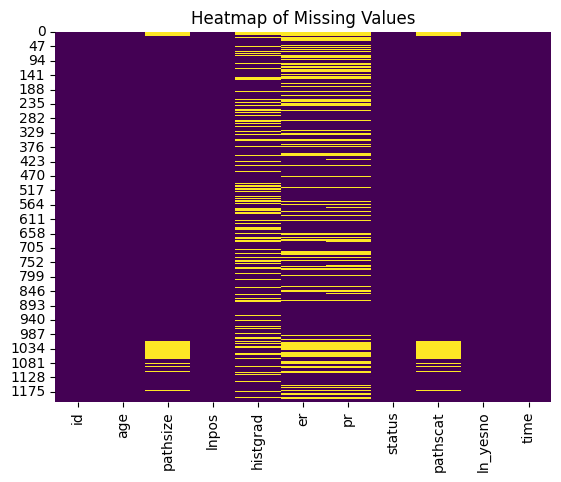

,0
id,0
age,0
pathsize,86
lnpos,0
histgrad,287
er,338
pr,356
status,0
pathscat,86
ln_yesno,0


In [9]:
# Plot the heatmap for missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Check for missing values
df.isnull().sum()

In [10]:
# Handle Missing Values
df['pathsize'].fillna(df['pathsize'].mean(), inplace=True)
df['histgrad'].fillna(df['histgrad'].mode()[0], inplace=True)
df['er'].fillna(df['er'].mode()[0], inplace=True)
df['pr'].fillna(df['pr'].mode()[0], inplace=True)
df['pathscat'].fillna(df['pathscat'].mode()[0], inplace=True)

<ipython-input-10-bad1d7084c47>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pathsize'].fillna(df['pathsize'].mean(), inplace=True)
<ipython-input-10-bad1d7084c47>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

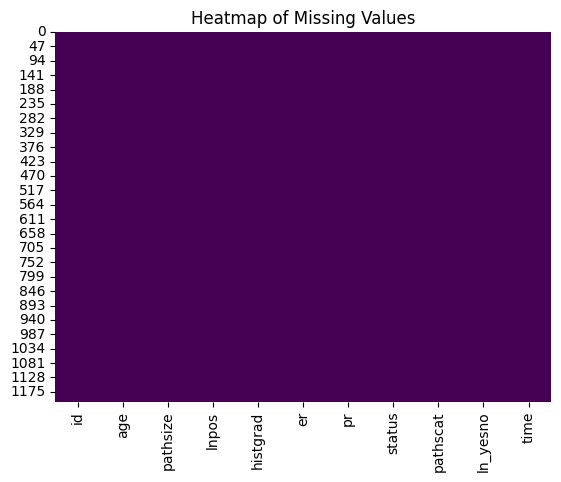

,0
id,0
age,0
pathsize,0
lnpos,0
histgrad,0
er,0
pr,0
status,0
pathscat,0
ln_yesno,0


In [11]:
# Check for missing values after handling missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()
df.isnull().sum()

In [12]:
df.tail()

,id,age,pathsize,lnpos,histgrad,er,pr,status,pathscat,ln_yesno,time
1202,1259.0,72.0,3.0,0.0,2.0,Positive,Positive,Censored,2-5 cm,No,88.933333
1203,1261.0,41.0,1.2,0.0,2.0,Positive,Positive,Censored,<= 2 cm,No,90.166667
1204,1262.0,71.0,1.6,0.0,3.0,Negative,Negative,Censored,<= 2 cm,No,22.566667
1205,1263.0,48.0,2.5,4.0,3.0,Negative,Negative,Censored,2-5 cm,Yes,45.200000
1206,1266.0,73.0,2.4,0.0,3.0,Positive,Positive,Censored,2-5 cm,No,6.100000


In [13]:
# Inspect Unique Values in Categorical Columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].unique()}")

histgrad: [3.0, 2.0, 1.0]
Categories (3, float64): [1.0, 2.0, 3.0]
er: ['Negative', 'Positive']
Categories (2, object): ['Negative', 'Positive']
pr: ['Negative', 'Positive']
Categories (2, object): ['Negative', 'Positive']
status: ['Censored', 'Died']
Categories (2, object): ['Censored', 'Died']
pathscat: ['<= 2 cm', '2-5 cm', '> 5 cm']
Categories (3, object): ['2-5 cm', '<= 2 cm', '> 5 cm']
ln_yesno: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


# **Correlation Analysis**

In [14]:
data = df.copy()
data.head()

,id,age,pathsize,lnpos,histgrad,er,pr,status,pathscat,ln_yesno,time
0,1.0,60.0,1.733488,0.0,3.0,Negative,Negative,Censored,<= 2 cm,No,9.466667
1,2.0,79.0,1.733488,0.0,2.0,Positive,Positive,Censored,<= 2 cm,No,8.600000
2,3.0,82.0,1.733488,0.0,2.0,Positive,Positive,Censored,<= 2 cm,No,19.333333
3,4.0,66.0,1.733488,0.0,2.0,Positive,Positive,Censored,<= 2 cm,No,16.333333
4,5.0,52.0,1.733488,0.0,3.0,Positive,Positive,Censored,<= 2 cm,No,8.500000


In [15]:
data.drop(['id'], axis=1, inplace=True)

er_mapping = {
    'Negative': 0,
    'Positive': 1}
data['er'] = data['er'].map(er_mapping)

pr_mapping = {
    'Negative': 0,
    'Positive': 1}
data['pr'] = data['pr'].map(pr_mapping)

status_mapping = {
    'Censored': 0,
    'Died': 1}
data['status'] = data['status'].map(status_mapping)

ln_yesno_mapping = {
    'No': 0,
    'Yes': 1}
data['ln_yesno'] = data['ln_yesno'].map(ln_yesno_mapping)

pathscat_mapping = {
    '<= 2 cm': 0,
    '2-5 cm': 1,
    '> 5 cm': 2}
data['pathscat'] = data['pathscat'].map(pathscat_mapping)

In [16]:
data.head()

,age,pathsize,lnpos,histgrad,er,pr,status,pathscat,ln_yesno,time
0,60.0,1.733488,0.0,3.0,0,0,0,0,0,9.466667
1,79.0,1.733488,0.0,2.0,1,1,0,0,0,8.600000
2,82.0,1.733488,0.0,2.0,1,1,0,0,0,19.333333
3,66.0,1.733488,0.0,2.0,1,1,0,0,0,16.333333
4,52.0,1.733488,0.0,3.0,1,1,0,0,0,8.500000


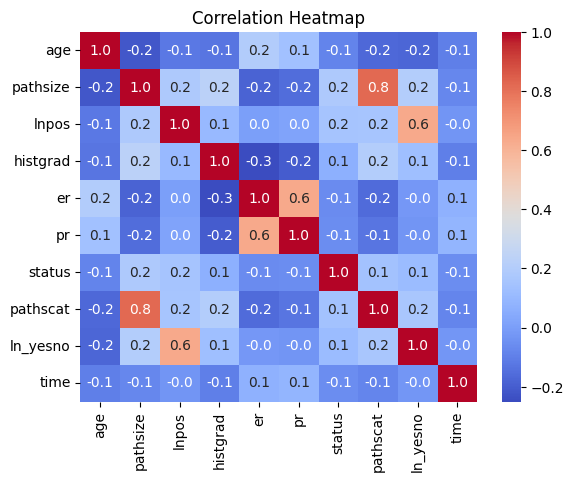

In [17]:
sns.heatmap(data.corr(), annot=True, fmt='.1f', cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

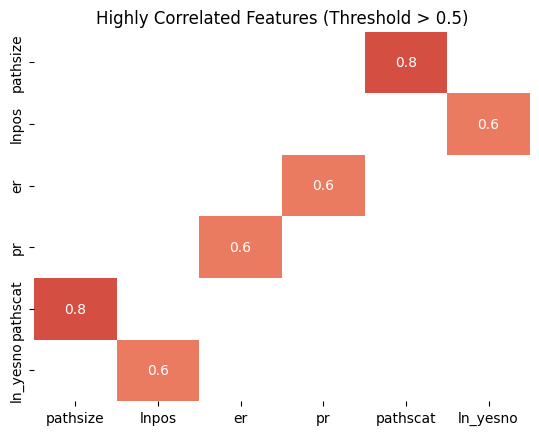

In [18]:
correlation_matrix = data.corr()
threshold = 0.5

high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)]

filtered_corr_matrix = high_corr.dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(filtered_corr_matrix, annot=True, fmt='.1f', cmap="coolwarm", cbar=False, vmin=-1, vmax=1)
plt.title("Highly Correlated Features (Threshold > 0.5)")
plt.show()

# **Visuslizations for univariate analysis**

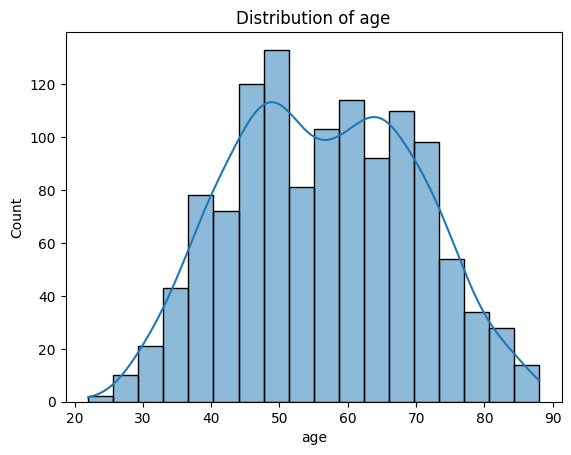

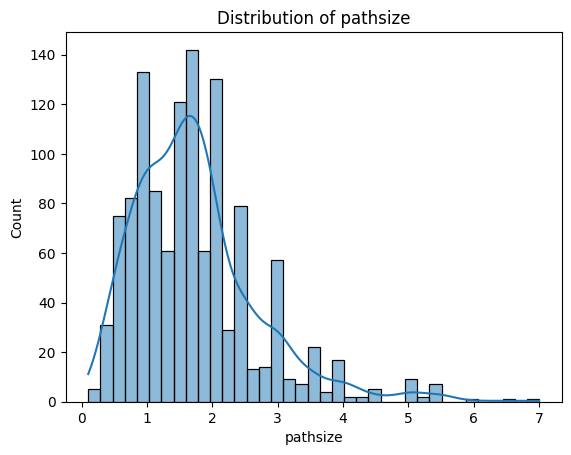

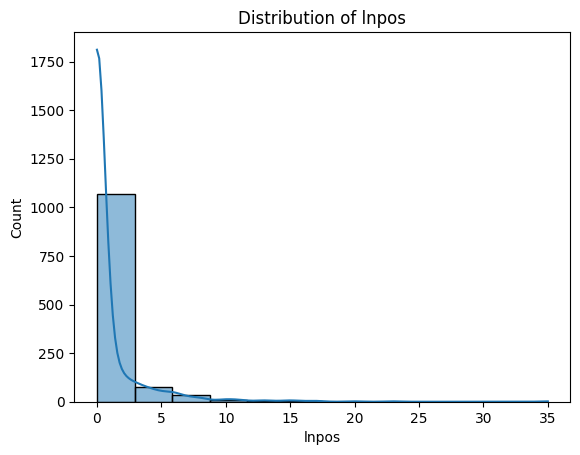

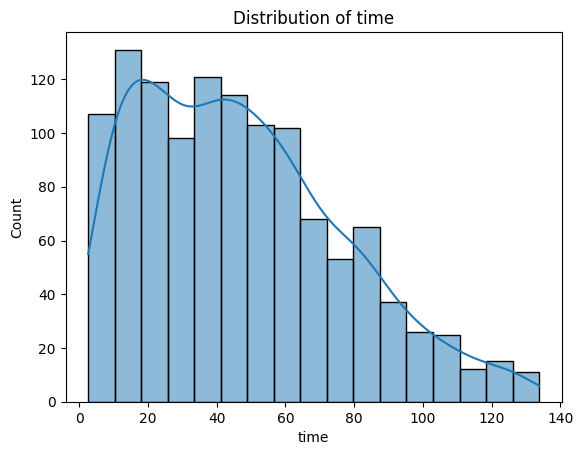

In [19]:
# Histograms for numerical columns to understand their distribution
for col in ['age', 'pathsize', 'lnpos', 'time']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

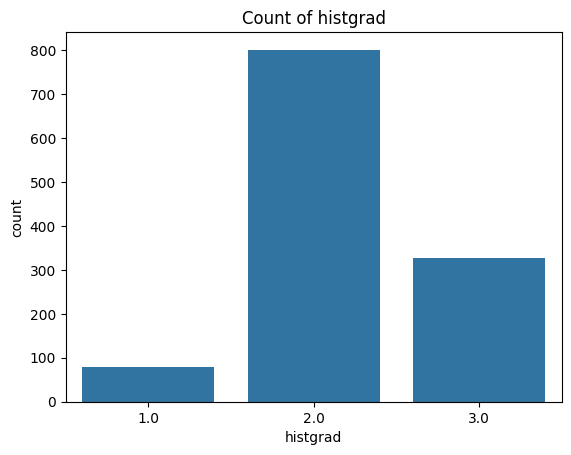

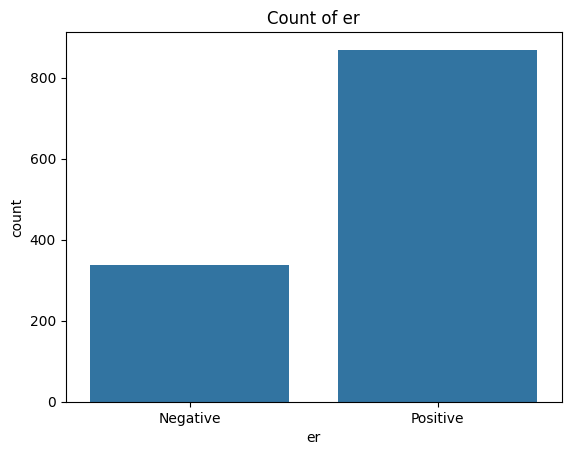

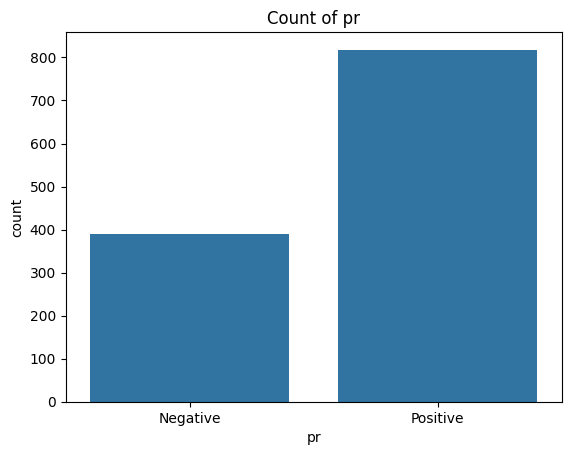

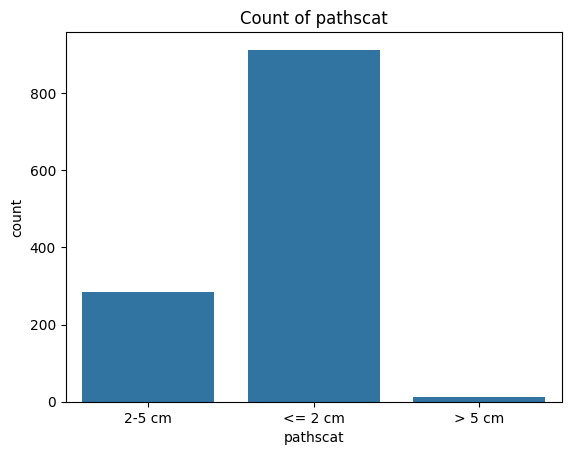

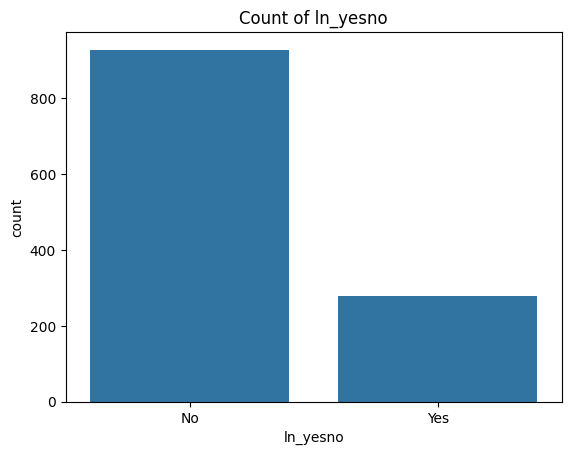

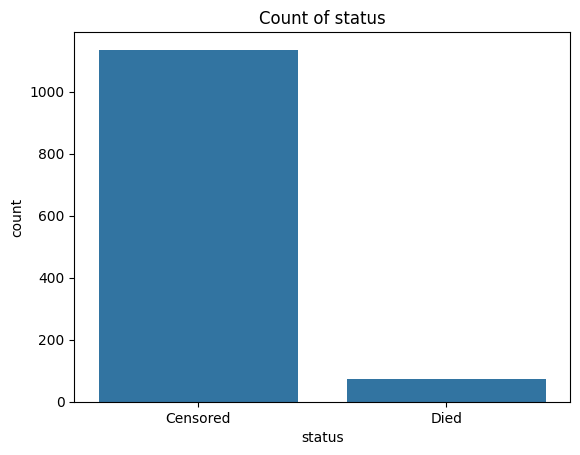

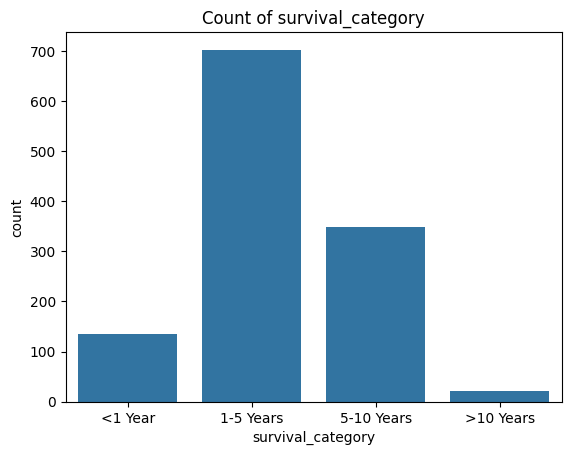

In [20]:
# Create survival category
df['survival_category'] = pd.cut(df['time'], bins=[0, 12, 60, 120, np.inf],
                                 labels=['<1 Year', '1-5 Years', '5-10 Years', '>10 Years'])

# Count plots for categorical columns to see their frequency distribution
for col in ['histgrad', 'er', 'pr', 'pathscat', 'ln_yesno', 'status', 'survival_category']:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

# **Visualizations for multivariate analysis**

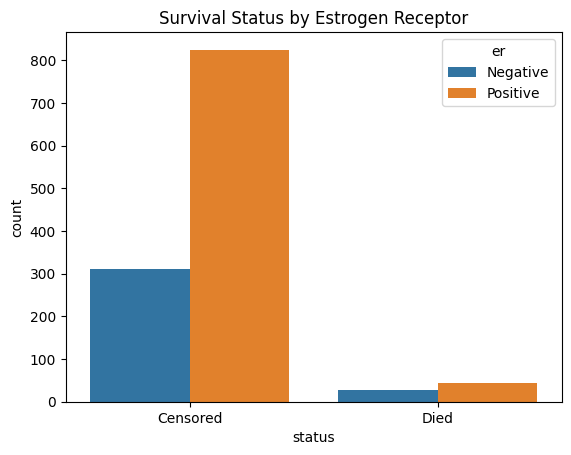

In [21]:
# Compare a categorical feature (er) across the target variable
sns.countplot(x='status', hue='er', data=df)
plt.title("Survival Status by Estrogen Receptor")
plt.show()

Among those with a "Censored" status, the majority are ER-positive, while ER-negative individuals form a smaller proportion.

Among those who "Died," ER-positive individuals are slightly more numerous than ER-negative ones, but the total counts in this category are much lower than the "Censored" group.

The plot indicates that ER-positive individuals are more prevalent in the dataset, and most people in the dataset have a "Censored" survival status.

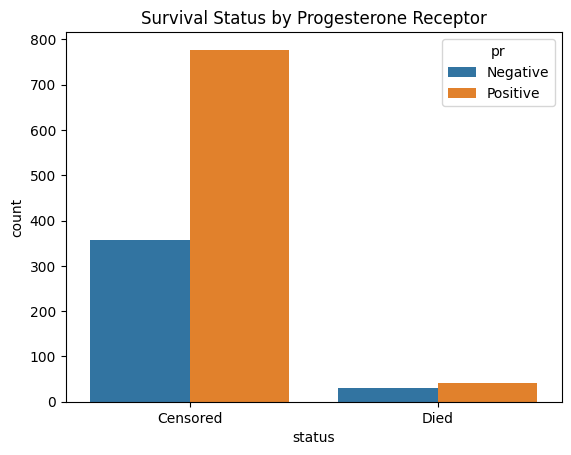

In [22]:
# Compare a categorical feature (pr) across the target variable
sns.countplot(x='status', hue='pr', data=df)
plt.title("Survival Status by Progesterone Receptor")
plt.show()

Among the "Censored" group, the majority are PR-positive, with PR-negative individuals forming a smaller proportion.

Among the "Died" group, the counts are much lower, but PR-positive individuals still outnumber PR-negative ones slightly.

Overall: This plot indicates that PR-positive individuals are more prevalent, and most of the individuals in the dataset have a "Censored" survival status.

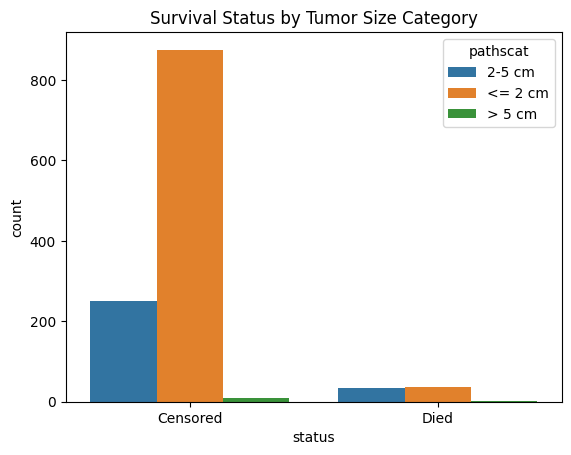

In [23]:
# Compare a categorical feature (pathscat) across the target variable
sns.countplot(x='status', hue='pathscat', data=df)
plt.title("Survival Status by Tumor Size Category")
plt.show()

The bar chart illustrates the distribution of survival status by tumor size category (pathscat).

**•	Censored Group:**
1.   The majority of individuals have small tumors (<= 2 cm).
1.   Medium-sized tumors (2-5 cm) are the next most common.
2.   A small number of individuals have large tumors (> 5 cm).

**•	Died Group:**
1.   Deaths are more frequent in individuals with larger tumors (> 5 cm).
2.   Medium-sized tumors (2-5 cm) also contribute to deaths, but at a lower count.
3.   Very few individuals with small tumors (<= 2 cm) are in the "Died" group.

This chart suggests a clear relationship between tumor size and survival status:
*   Smaller tumors (<= 2 cm) are associated with better survival outcomes (higher censored counts).
*   Larger tumors (> 5 cm) are more likely to result in mortality.
It emphasizes the importance of early detection and treatment to improve survival rates.

It emphasizes the importance of early detection and treatment to improve survival rates.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


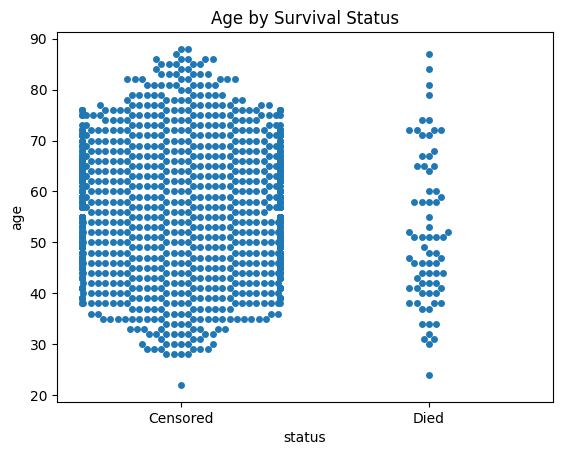

In [24]:
# Visualize Time (Month) by Survival Status (Status)
sns.swarmplot(x='status', y='age', data=df)
plt.title("Age by Survival Status")
plt.show()

The plot indicates that individuals of all ages are represented in both survival statuses.

However, more individuals are in the "Censored" group across all ages, which suggests a higher overall survival rate in the dataset.

The smaller "Died" group might reflect a pattern where middle-aged individuals (50–70) are more likely to have passed away, though the dataset would need statistical analysis to confirm trends.


<ipython-input-25-091fdf8f0b97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='status', y='lnpos', palette='muted')


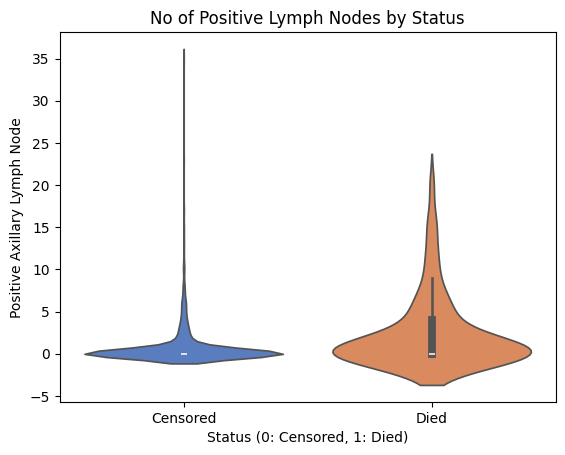

In [25]:
# Violin plot for Positive Axillary Lymph Nodes by status
sns.violinplot(data=df, x='status', y='lnpos', palette='muted')
plt.title("No of Positive Lymph Nodes by Status")
plt.xlabel("Status (0: Censored, 1: Died)")
plt.ylabel("Positive Axillary Lymph Node")
plt.show()

Individuals with fewer positive lymph nodes are more likely to fall into the "Censored" group, indicating better survival outcomes.

The "Died" group has a wider and higher distribution of positive lymph nodes, suggesting that a higher number of positive lymph nodes might be associated with worse survival outcomes.

This plot highlights the potential relationship between the number of positive lymph nodes and survival, which could be a factor worth exploring further.

<ipython-input-26-3740da5fa420>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='pathsize', palette="Set2")


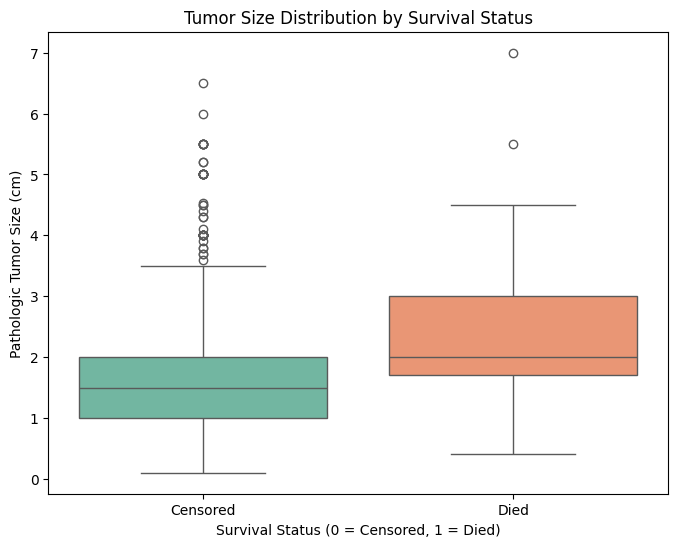

In [26]:
# Tumor Size vs. Survival Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='status', y='pathsize', palette="Set2")
plt.title("Tumor Size Distribution by Survival Status")
plt.xlabel("Survival Status (0 = Censored, 1 = Died)")
plt.ylabel("Pathologic Tumor Size (cm)")
plt.show()

Tumor Size in Censored Group: Most tumors in this group are within a smaller size range, with several outliers showing larger tumors.

Tumor Size in Died Group: The range (spread) of tumor sizes is wider, suggesting higher variability in this group.

This implies that larger tumor sizes are associated with poorer survival (higher likelihood of death), as the "Died" group generally has larger tumors than the "Censored" group.


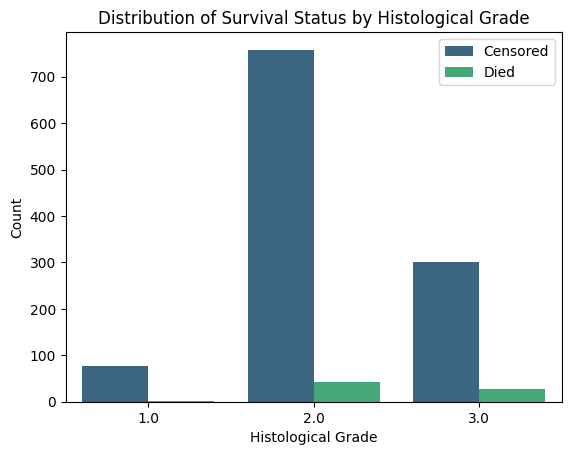

Proportion of Status by Histological Grade:
status    Censored      Died
histgrad                    
1.0       0.974684  0.025316
2.0       0.946317  0.053683
3.0       0.917431  0.082569


<ipython-input-27-c0072457d990>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  histgrad_status = df.groupby('histgrad')['status'].value_counts(normalize=True).unstack()


In [27]:
# Compare a categorical feature (Histgrad) across the target variable
# Plot distribution of 'status' across 'histgrad'
sns.countplot(data=df, x='histgrad', hue='status', palette='viridis')
plt.title("Distribution of Survival Status by Histological Grade")
plt.xlabel("Histological Grade")
plt.ylabel("Count")
plt.legend(['Censored', 'Died'])
plt.show()

# Calculate proportions
histgrad_status = df.groupby('histgrad')['status'].value_counts(normalize=True).unstack()
print("Proportion of Status by Histological Grade:")
print(histgrad_status)

**Grade 1:** The plot shows that most individuals with grade 1 tumors fall into the "Censored" category, meaning they survived or were lost to follow-up. This aligns with clinical evidence that grade 1 breast cancers are less aggressive, respond better to treatment, and are associated with higher survival rates.

**Grade 2:** Most Common Tumor Grade: Grade 2 tumors dominate the dataset. While the majority are in the "Censored" group, a small proportion are in the "Died" group. This reflects that grade 2 tumors have an intermediate prognosis—better than grade 3 but worse than grade 1. Treatment response and survival outcomes can vary depending on other factors like hormone receptor status and HER2 status.

**Grade 3:** Higher Risk of Mortality: A higher proportion of deaths are observed in the grade 3 group compared to the other grades. This is consistent with clinical findings that grade 3 breast cancers are more aggressive, spread faster, and are more likely to lead to poorer outcomes. These cancers often require more aggressive treatment, such as chemotherapy in addition to surgery and/or radiation.

**Insights:**

•	The distribution in the plot aligns with what is observed in breast cancer research: lower-grade tumors are associated with better survival outcomes, while higher-grade tumors carry a higher risk of mortality.

•	Histological grade, combined with other factors such as tumor size, lymph node involvement, hormone receptor status (e.g., ER/PR), and HER2 status, is essential in guiding breast cancer treatment decisions.


<ipython-input-28-c78c718539fc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ln_yesno', y='time', hue='status', ci=None, palette='viridis')


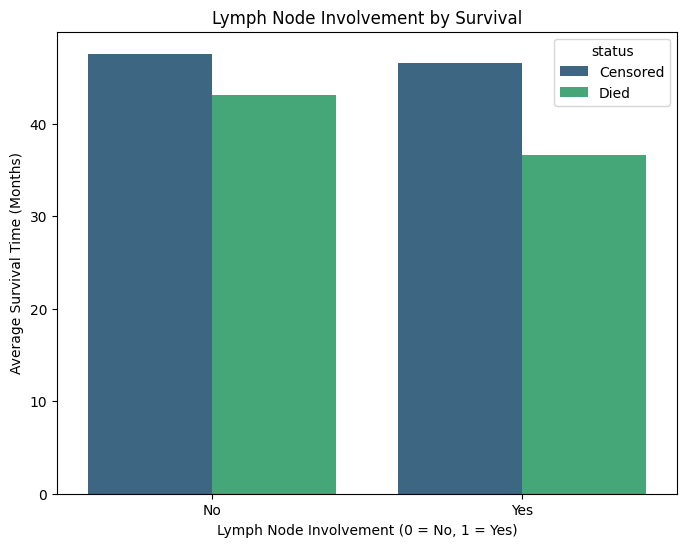

In [28]:
# Lymph Node Involvement vs. Survival
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='ln_yesno', y='time', hue='status', ci=None, palette='viridis')
plt.title("Lymph Node Involvement by Survival")
plt.xlabel("Lymph Node Involvement (0 = No, 1 = Yes)")
plt.ylabel("Average Survival Time (Months)")
plt.show()

For both groups (No and Yes lymph node involvement), the "Censored" group (survived or lost to follow-up) has a longer average survival time compared to the "Died" group.

The decrease in survival time for those who died is more significant in the presence of lymph node involvement.

Patients without lymph node involvement have better outcomes, as shown by the higher average survival time.

Lymph node involvement significantly impacts survival in breast cancer, highlighting the importance of early detection and treatment before cancer spreads to the lymph nodes. This data can help guide treatment decisions, such as the need for systemic therapy in cases with node-positive disease.


<ipython-input-29-cca03f5115cb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['status'] == 1]['time'], label='Died', shade=True)
<ipython-input-29-cca03f5115cb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['status'] == 0]['time'], label='Censored', shade=True)


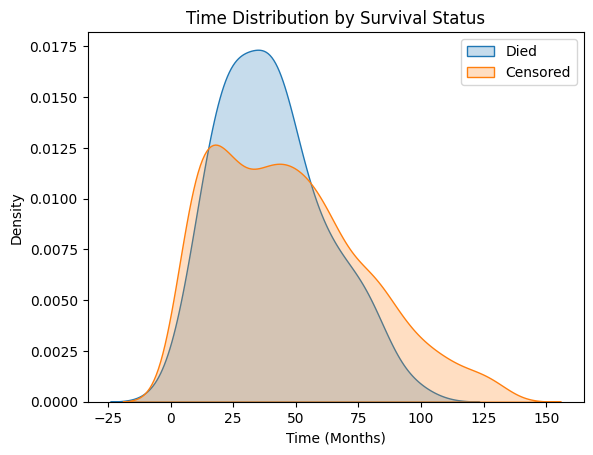

In [29]:
# Visualize the distribution of Time (Months) for Died (Status 1) and Censored (Status 0)
sns.kdeplot(data[data['status'] == 1]['time'], label='Died', shade=True)
sns.kdeplot(data[data['status'] == 0]['time'], label='Censored', shade=True)
plt.title("Time Distribution by Survival Status")
plt.xlabel("Time (Months)")
plt.ylabel("Density")
plt.legend()
plt.show()

This is a kernel density plot showing the distribution of time (in months) for two different survival statuses: "Died" and "Censored". Here's an insight:

•	Died (Blue) peaks earlier, suggesting a concentration of deaths occurs around that time.

•	Censored (Orange) peaks slightly later and appears to extend longer, reflecting individuals who survived or were censored for longer durations.

•	Most events (deaths or censored observations) occur within the first 50 months, as the density decreases significantly afterward.

•	The censored group tends to have a wider spread, likely due to longer durations of follow-up.


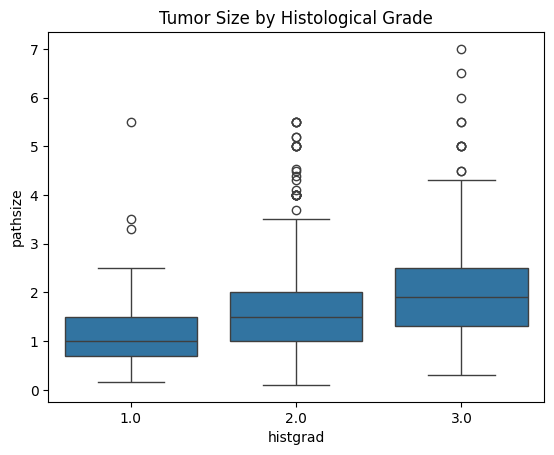

In [30]:
# Compare Tumor Size (Pathsize) by Histological Grade (Histgrad)
sns.boxplot(x='histgrad', y='pathsize', data=df)
plt.title("Tumor Size by Histological Grade")
plt.show()

Tumor size increases with higher histological grades, which indicate that more aggressive tumors (higher grade) tend to grow larger.

The variability in tumor size also increases with the histological grade.

Outliers in higher grades could represent cases with exceptionally large tumors, suggesting aggressive progression.

This visualization suggests that tumor size may increase with histological grade, highlighting the potential relationship between tumor aggressiveness and size.


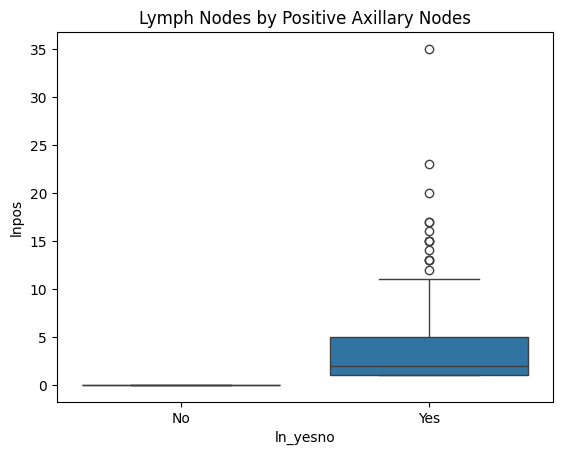

In [31]:
# Compare Positive Axillary Nodes (Lnpos) by Lymph Node Presence (Ln_yesno)
sns.boxplot(x='ln_yesno', y='lnpos', data=df)
plt.title("Lymph Nodes by Positive Axillary Nodes")
plt.show()

The boxplot visualizes the number of positive lymph nodes (lnpos) based on the presence of positive axillary nodes (ln_yesno).

•	No Positive Axillary Nodes ("No"): Lymph node involvement is effectively zero (consistent with the absence of positive nodes).

•	Positive Axillary Nodes ("Yes"):
1.   Lymph node counts are more variable, with a median around 1-2 positive nodes.
2.   There are several outliers with higher counts (e.g., greater than 8 positive nodes).

This boxplot confirms that when positive axillary lymph nodes are detected, the number of positive lymph nodes varies significantly. Conversely, when no positive axillary nodes are found, lymph node involvement is negligible. This relationship highlights the importance of axillary node status in evaluating disease severity.


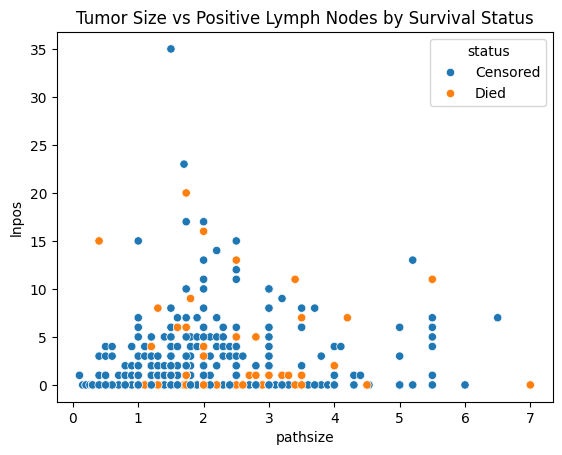

In [32]:
# Visualize interaction between Tumor Size (Pathsize) and Lymph Node Positive Status (Lnpos)
sns.scatterplot(x='pathsize', y='lnpos', hue='status', data=df)
plt.title("Tumor Size vs Positive Lymph Nodes by Survival Status")
plt.show()

The scatterplot visualizes the relationship between tumor size (pathsize) and the number of positive lymph nodes (lnpos), categorized by survival status (Censored or Died).

As tumor size increases (pathsize > 3) and the number of positive lymph nodes rises (lnpos > 10), the density of orange dots (deaths) increases slightly, though censored cases still dominate.

There seems to be a positive correlation between tumor size and the number of positive lymph nodes, meaning larger tumors are generally associated with more lymph node involvement.

Patients with smaller tumor sizes (pathsize < 3) and fewer positive lymph nodes (lnpos < 5) have a higher likelihood of being censored (blue dots dominate).

Patients with larger tumor sizes and more positive lymph nodes are more likely to have died (orange dots increase).

**Clinical Interpretation:**

•	Tumor size (pathsize) and lymph node involvement (lnpos) are important prognostic factors for survival in breast cancer.

•	Larger tumors and a higher number of positive lymph nodes are associated with poorer survival outcomes (higher death rates), as seen in the increasing prevalence of orange dots in the upper right region of the plot.

•	However, survival is still possible even in cases with significant lymph node involvement or larger tumors, as evidenced by the presence of blue dots in those regions.


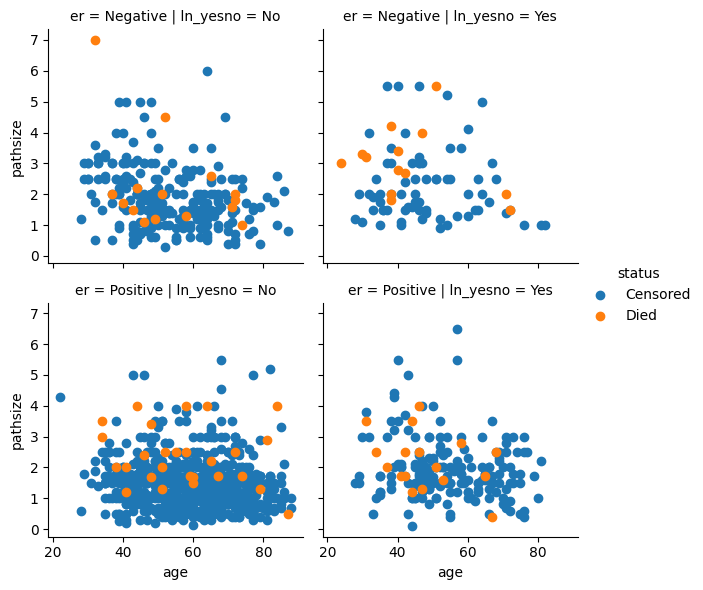

In [33]:
# Using FacetGrid to view relationships by Lymph Node Presence and Estrogen Receptor Status
g = sns.FacetGrid(df, col='ln_yesno', row='er', hue='status')
g.map(plt.scatter, 'age', 'pathsize')
g.add_legend()
plt.show()

This grid of scatterplots visualizes the relationship between age, tumor size (pathsize), and survival status, with subgroups stratified by estrogen receptor (ER) status and lymph node involvement (ln_yesno).
1.	Lymph Node Involvement: The presence of positive lymph nodes (ln_yesno = Yes) is associated with worse survival outcomes (more orange dots in the top-right and bottom-right plots).
2.	ER Status: ER-positive patients generally have better survival outcomes than ER-negative patients, particularly in cases without lymph node involvement.
3.	Tumor Size: Larger tumor sizes (pathsize > 3) are more frequently associated with deaths (orange dots).
4.	Age does not show a strong linear correlation with survival status in this visualization.

**Clinical Implications:**

•	ER status and lymph node involvement are critical factors in predicting survival.

•	Patients with ER-negative tumors and lymph node involvement are at the highest risk of poor outcomes.

•	Early detection and treatment of smaller tumors, especially in patients without lymph node involvement, are key to improving survival rates.


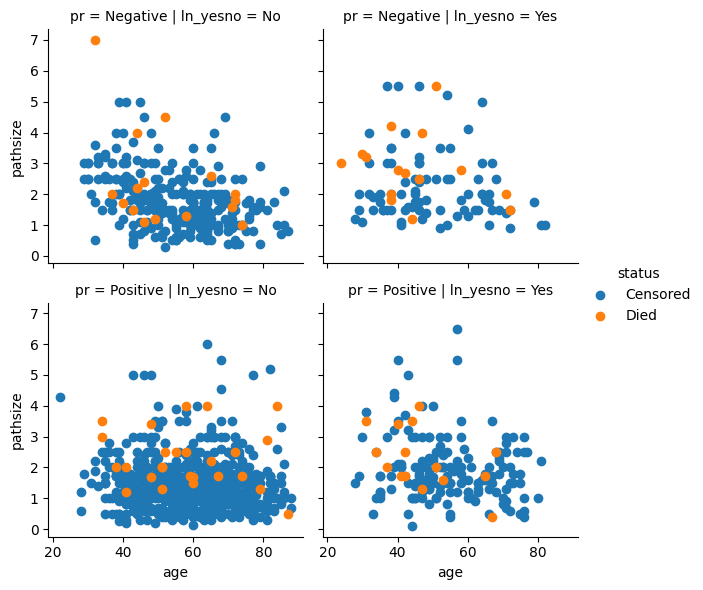

In [34]:
# Using FacetGrid to view relationships by Lymph Node Presence and Estrogen Receptor Status
g = sns.FacetGrid(df, col='ln_yesno', row='pr', hue='status')
g.map(plt.scatter, 'age', 'pathsize')
g.add_legend()
plt.show()

This plot is a facet grid scatter plot, showing the relationships between age (x-axis), pathsize (y-axis), and survival status (Censored vs. Died) across different combinations of two categorical variables: pr (positive/negative) and ln_yesno (presence or absence of positive lymph nodes).

•	The presence of positive lymph nodes (ln_yesno = Yes) seems associated with a broader range of pathology sizes and includes more cases with larger tumors.

•	Patients with pr = Positive appear to have a broader spread of outcomes and may represent a subgroup requiring further investigation. This status could reflect a biological or clinical factor influencing disease progression.

•	The combination ln_yesno = Yes and pr = Positive (bottom right) might represent a high-risk group due to the broader spread and more observed deaths. These patients may need closer monitoring and aggressive treatment.


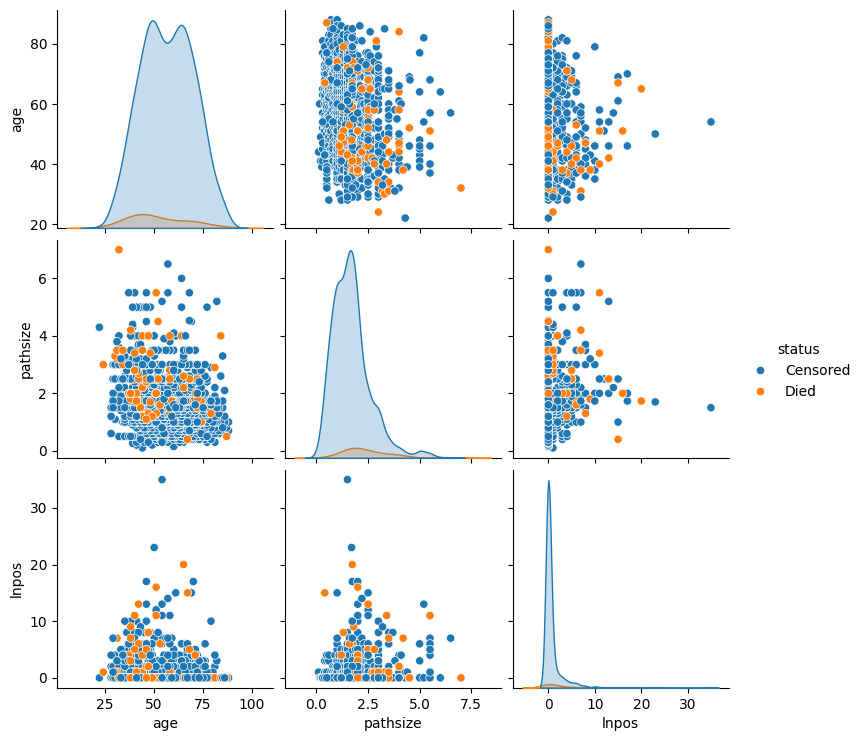

In [35]:
# Explore relationships between numerical variables and the target variable
sns.pairplot(df, hue='status', vars=['age', 'pathsize', 'lnpos'])
plt.show()

This is a pairplot, commonly used for visualizing pairwise relationships between multiple numerical variables. The plot shows the relationships between age, pathsize (pathology size), and lnpos (number of positive lymph nodes) for two groups: Censored (blue dots) and Died (orange dots).

**Diagonal Plots**

• Age: Bimodal distribution, indicating two prominent age groups in the population.
• Pathsize: Skewed distribution with most values concentrated at smaller sizes.

• Lnpos: Strongly skewed distribution, with most cases having very few positive lymph nodes.


**Off-Diagonal Plots**

•	Age vs. Pathsize: Shows no clear trend; both censored and died groups are widely distributed.

•	Age vs. Lnpos: Also shows no clear relationship; younger and older individuals are represented across both groups.

•	Pathsize vs. Lnpos: Indicates a positive correlation; larger pathology sizes are associated with a higher number of positive lymph nodes.

**Insights**

•	The age distribution is bimodal, suggesting distinct younger and older patient populations.

•	Larger pathology sizes (pathsize) are more frequently associated with higher positive lymph node counts (lnpos), which is often a marker of disease severity or progression.

•	The distribution of lnpos is highly skewed, with most patients having low values, but higher lnpos values are more associated with the "Died" group. This aligns with clinical observations where more positive lymph nodes indicate worse prognosis.


# **Survival Analysis**

In [36]:
!pip install lifelines
from lifelines import CoxPHFitter

# Create a Cox proportional hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(data, duration_col='time', event_col='status')

# Summary of the Cox model
cph.print_summary()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 11.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=241b9f78b946556548049f37d45cbb18095b62e76cdb157d5c74b1f633a32be7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 1207 total observations, 1135 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 1207
number of events observed = 72
   partial log-likelihood = -431.71
         time fit was run = 2025-01-12 21:25:06 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.00      1.00      0.01           -0.02            0.02                0.98                1.02
pathsize   0.53      1.70      0.19            0.16            0.90                1.17                2.46
lnpos      0.08      1.08      0.03            0.02            0.13                1.02                1.14
histgrad   0.25      1.29      0.24           -0.21            0.71                0.81                2.04
er        -0.08      0.92      0.36           -0.78            0.62                0.46                1.86
pr        -0.36      0.70      0.34           -1.03            0.31                0.36                1.37
pathscat  -0.11      0.90      0.41           -0.90            0.69                0.40                2.00
ln_yesno   0.29      1.33      0.30           -0.30            0.88                0.74                2.41

           cmp to     z    p  -log2(p)
covariate                             
age          0.00 -0.34 0.73      0.45
pathsize     0.00  2.79 0.01      7.56
lnpos        0.00  2.56 0.01      6.58
histgrad     0.00  1.07 0.29      1.81
er           0.00 -0.23 0.82      0.29
pr           0.00 -1.05 0.30      1.76
pathscat     0.00 -0.26 0.79      0.33
ln_yesno     0.00  0.95 0.34      1.55
---
Concordance = 0.76
Partial AIC = 879.42
log-likelihood ratio test = 53.66 on 8 df
-log2(p) of ll-ratio test = 26.89

**Survival Analysis:**
Variable Interpretations:
1.	Age:
*   Coefficient: -0.00, Hazard Ratio: 1.00
*   Age has no significant effect on survival (p = 0.73).

2.	**Pathsize (Pathological Tumor Size):**
*   Coefficient: 0.53, Hazard Ratio: 1.70
*   Larger tumor size significantly increases the hazard (p = 0.01). For every unit increase in tumor size, the hazard of dying increases by 70%.

3.	**lnpos (Number of Positive Lymph Nodes):**
*   Coefficient: 0.08, Hazard Ratio: 1.08
*   A higher number of positive lymph nodes is associated with increased hazard (p = 0.01). For each additional positive lymph node, the hazard increases by 8%.

4.	**Histgrad (Histological Grade):**
*   Coefficient: 0.25, Hazard Ratio: 1.29
*   Higher histological grade trends towards increased hazard, but the effect is not statistically significant (p = 0.29).

5.	**ER (Estrogen Receptor Status):**
*   Coefficient: -0.08, Hazard Ratio: 0.92
*   ER status has no significant effect on survival (p = 0.82).

6.	**PR (Progesterone Receptor Status):**
*   Coefficient: -0.36, Hazard Ratio: 0.70
*   PR status shows a trend toward reduced hazard, but the effect is not statistically significant (p = 0.30).

7.	**Pathscat (Categorical Pathological Size):**
*   Coefficient: -0.11, Hazard Ratio: 0.90
*   No significant effect on survival (p = 0.79).

8.	**ln_yesno (Lymph Node Involvement - Yes/No):**
*   Coefficient: 0.29, Hazard Ratio: 1.33
*   Lymph node involvement increases hazard, but this effect is not statistically significant (p = 0.34).

Insights
1.	Pathsize (Tumor Size) and lnpos (Positive Lymph Nodes) are the most significant predictors of survival in this analysis.
o	Larger tumors and higher lymph node involvement significantly worsen survival.
2.	Other variables (e.g., Age, ER, PR status, histological grade) show trends but do not reach statistical significance in this dataset.
3.	Tumor size (Pathsize) has the strongest effect, with a hazard ratio of 1.70, meaning individuals with larger tumors are 70% more likely to experience worse outcomes.
4.	The p-values of some predictors are >0.05, indicating their effects are not significant and could be due to chance.

**Conclusion:**
The analysis confirms the importance of tumor size and lymph node involvement as significant prognostic factors in breast cancer survival. Other factors like hormone receptor status (ER, PR) and histological grade require further investigation, as their effects may depend on other variables or interactions not captured in the dataset.


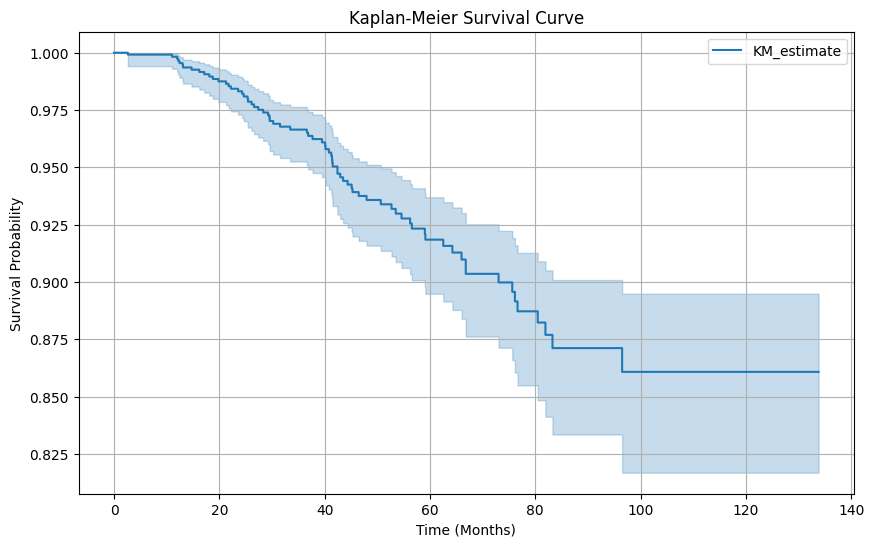

In [37]:
# Survival Analysis with Kaplan-Meier curves
from lifelines import KaplanMeierFitter

# Prepare data
time = data['time']
status = data['status']

# Fit Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(time, event_observed=status)

# Plot survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()